# Análise dos pós-graduandos egressos da UFRN

( Informações gerais da equipe *blablabla* ) **EDITAR**

A [UFRN](http://www.ufrn.br/) (Universidade Federal do Rio Grande do Norte) possui um órgão responsável pelo gerenciamento dos programas de pós-graduação, que é a [Pró-reitoria de Pós-graduação](http://www.ppg.ufrn.br/index.php) (PPG) cujo 
> "desempenha um papel fundamental na expansão e consolidação do Sistema de Pós-graduação no âmbito da Universidade, na pespectiva de contribuir com as demandas da Sociedade Norte-rio-grandense e brasileira, como um importante instrumento de qualificação acadêmica e técnica." [[1]](http://www.ppg.ufrn.br/pagina.php?a=apresentacao#)

O ensino de pós-graduação da UFRN abrange tanto os programas *Stricto sensu* (Mestrado e Doutorado) quanto *Lato sensu* (Especialização e Residências em Saúde e outras áreas do conhecimento).

(ainda to melhorando o texto de intro)

**Perguntas que queremos responder (por ordem de prioridade)**

1. Quantos alunos de pós-graduação vieram de uma graduação anterior na UFRN?
2. Agrupando os programas de pós-graduação em áreas do saber (decidir como fazer isso, caso não haja essa informação no database), quais cursos mais contribuem para o reingresso de seus alunos na pós?
3. É possível traçar um perfil de um graduando que reingressará numa pós? Se sim, qual é o perfil? (essa pergunta talvez não seja tão interessante, buscar respondê-la caso haja tempo)

# Importando as bibliotecas

In [3]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analisando o grupo http://dados.ufrn.br/group/ensino

In [4]:
# dados abertos ufrn
# http://dados.ufrn.br/

# urls dos dados
alunos_2016_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016'
alunos_2015_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/e2b5b843-4f58-497e-8979-44daf8df8f94/download/discentes-2015'
alunos_2014_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/6c23a430-9a7c-4d0f-9602-1d5d97d40e6a/download/discentes-2014'
alunos_2013_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dba208c2-822f-4e26-adc3-b61d4cb110b6/download/discentes-2013'
alunos_2012_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/fc283aa9-61a7-4cf0-91fb-c403c0817b48/download/discentes-2012'
alunos_2011_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/2bb3dec9-7f23-434c-a179-21515f91abc8/download/discentes-2011'
alunos_2010_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/5fc61f78-19b4-4020-9f3c-c298cb8a63aa/download/discentes-2010'
alunos_2009_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/861b96a8-5304-4e6a-a8c4-068533ec7cb9/download/discentes-2009'

alunos_url = {alunos_2016_url, alunos_2015_url, alunos_2014_url, 
              alunos_2013_url, alunos_2012_url, alunos_2011_url, 
              alunos_2010_url, alunos_2009_url}

bolsas_url = 'http://dados.ufrn.br/dataset/81608a4d-c76b-4758-a8d8-54be32209833/resource/d21c94fe-22ba-4cf3-89db-54d8e739c567/download/bolsistas-de-iniciacao-cientifica.csv'

# alunos (2009 - 2016)
alunos = []
   
for i in alunos_url:
    alunos.append(pd.read_csv(i, sep=';'))

# bolsas de iniciação científica
bolsas = pd.read_csv(bolsas_url, sep=';')
#criar um dataframe com todas as listas
alunos_all = pd.concat(alunos)

alunos_all

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,2.014000e+09,A,2014,1.0,ALUNO ESPECIAL,ESPECIAL,ATIVO,G,GRADUAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.014338e+09,AARON LEONEL DE ALMEIDA DAMASCENO,2014,2.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,4746233.0,TECNICO EM AGROPECUARIA SUBSEQUENTE,PRESENCIAL,351.0,ESCOLA AGRÍCOLA DE JUNDIAÍ,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,2.014352e+09,ABDENIO VICTOR PEREIRA DA SILVA,2014,2.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,108837709.0,CURSO TÉCNICO EM MANUTENÇÃO E SUPORTE EM INFOR...,PRESENCIAL,205.0,ESCOLA DE SAÚDE,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
3,2.014048e+09,ABDIAS MARTINS DE CASTRO NETO,2014,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
4,2.014323e+09,ABDI SADDAI COSTA DE ARAÚJO,2014,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
5,2.014066e+09,ABDOM DOS SANTOS CANINDÉ,2014,1.0,SiSU,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
6,2.014101e+09,ABDON SILVA RIBEIRO DA CUNHA,2014,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,ATIVO,D,DOUTORADO,315765.0,DOUTORADO EM ADMINISTRAÇÃO,PRESENCIAL,74.0,PROGRAMA DE PÓS-GRADUAÇÃO EM ADMINISTRAÇÃO,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
7,2.014129e+09,ABELARDO MONTEIRO BEZERRA DE MELO NETO,2014,2.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,E,MESTRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.014037e+09,ABEL MENDONCA ALVES,2014,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,2000056.0,MEDICINA,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
9,2.014313e+09,ABEL VENANCIO DO VALE,2014,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [22]:
#filtra os alunos de doutorado
dout_all = alunos_all.loc[ alunos_all['nivel_ensino'] == 'DOUTORADO']
dout_all.sort_values(by='nome_discente')

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
1,2.009116e+09,ABDO FARRET NETO,2009,2.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CONCLUÍDO,D,DOUTORADO,9300591.0,DOUTORADO EM DESENVOLVIMENTO E INOVAÇÃO TECNOL...,PRESENCIAL,4847.0,PROGRAMA DE PÓS-GRADUAÇÃO EM DESENVOLVIMENTO E...,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
6,2.014101e+09,ABDON SILVA RIBEIRO DA CUNHA,2014,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,ATIVO,D,DOUTORADO,315765.0,DOUTORADO EM ADMINISTRAÇÃO,PRESENCIAL,74.0,PROGRAMA DE PÓS-GRADUAÇÃO EM ADMINISTRAÇÃO,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
5,2.009111e+09,ABIGAIL NOÁDIA BARBALHO DA SILVA,2009,1.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,D,DOUTORADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.010123e+09,ABIGAIL NOÁDIA BARBALHO DA SILVA,2010,2.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,D,DOUTORADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2.016102e+10,ABIMAEL AMARO XAVIER BARBOSA,2016,1.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,ATIVO,D,DOUTORADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2.009112e+09,ACARILIA EDUARDO DA SILVA,2009,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CONCLUÍDO,D,DOUTORADO,315774.0,DOUTORADO EM CIÊNCIAS DA SAÚDE,PRESENCIAL,66.0,PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIAS DA SAÚDE,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
24,2.010125e+09,ACARIZIA EDUARDO DA SILVA,2010,2.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CONCLUÍDO,D,DOUTORADO,9285380.0,DOUTORADO EM BIOQUÍMICA,PRESENCIAL,1639.0,PROGRAMA DE PÓS-GRADUAÇÃO EM BIOQUÍMICA,440.0,CENTRO DE BIOCIÊNCIAS
37,2.016101e+10,ADA CRISTINA JÁCOME SARMENTO SILVA,2016,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,ATIVO,D,DOUTORADO,95726200.0,DOUTORADO EM FISIOTERAPIA,PRESENCIAL,4072.0,PROGRAMA DE PÓS-GRADUAÇÃO EM FISIOTERAPIA,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
48,2.013102e+09,ADA LIMA FERREIRA DE SOUSA,2013,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CONCLUÍDO,D,DOUTORADO,315758.0,DOUTORADO EM ESTUDOS DA LINGUAGEM,PRESENCIAL,65.0,PROGRAMA DE PÓS-GRADUAÇÃO EM ESTUDOS DA LINGUAGEM,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
44,2.016103e+10,ADALA NAYANA DE SOUSA MATA,2016,2.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,ATIVO,D,DOUTORADO,84739891.0,DOUTORADO EM SAÚDE COLETIVA,PRESENCIAL,5670.0,PROGRAMA DE PÓS-GRADUAÇÃO EM SAÚDE COLETIVA,441.0,CENTRO DE CIÊNCIAS DA SAÚDE


In [23]:
#filtra os alunos de graduação
grad = alunos_all.loc[ alunos_all['nivel_ensino'] == 'GRADUAÇÃO']
grad.sort_values(by='nome_discente')


,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
5329,2.010038e+09,\tFRANCISCO MOURA DO VALE NETO\t,2010,2.0,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
5328,2.010007e+09,\tFRANCISCO MOURA DO VALE NETO\t,2010,1.0,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,15315770.0,ADMINISTRAÇÃO PÚBLICA,A DISTÂNCIA,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
0,2.014000e+09,A,2014,1.0,ALUNO ESPECIAL,ESPECIAL,ATIVO,G,GRADUAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2.011011e+09,AARON ROBSON RODRIGUES DE OLIVEIRA,2011,2.0,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
0,2.013010e+09,ABA-ELBER GEORGE PEREIRA CAVALCANTE,2013,1.0,REINGRESSO AUTOMATICO,REGULAR,CANCELADO,G,GRADUAÇÃO,2000054.0,MATEMÁTICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
1,2.011078e+09,ABDENEGO AIRES DA SILVA GALVAO,2011,1.0,REINGRESSO DE GRADUADO,REGULAR,CANCELADO,G,GRADUAÇÃO,2000046.0,HISTÓRIA,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
2,2.016092e+09,ABDENIO VICTOR PEREIRA DA SILVA,2016,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000032.0,ENGENHARIA QUÍMICA,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
2,2.013092e+09,ABDENOR BEZERRA DOS SANTOS,2013,2.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,118834827.0,COMUNICAÇÃO SOCIAL- PUBLICIDADE E PROPAGANDA,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
2,2.011017e+09,ABDIAS DA SILVA TAVARES,2011,1.0,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
3,2.014048e+09,ABDIAS MARTINS DE CASTRO NETO,2014,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [7]:
#verifica a interseção entre nomes de alunos nas duas tabelas acima
dout_ufrn = set.intersection(set(dout_all['nome_discente']), set(grad['nome_discente']))
dout_ufrn

{'ABIMAEL AMARO XAVIER BARBOSA',
 'ADAN SADY DE MEDEIROS SILVA',
 'ADAUTO LUIS TADEO B DA FONSECA',
 'ADOLFO LOPES DE FIGUEREDO',
 'ADRIANA FRUTUOSO BARBOSA',
 'ADRIANNE PAULA VIEIRA DE ANDRADE',
 'ADRIANO ALMEIDA FERREIRA',
 'ADRIANO MARQUES DA SILVA',
 'ADRIANO MEDEIROS COSTA',
 'ALAINE MARIA DOS SANTOS SILVA',
 'ALANA DRIZIE GONZATTI DOS SANTOS',
 'ALANE DE MEDEIROS SILVA',
 'ALCINEY MIRANDA CABRAL',
 'ALESSANDRA DANIELE DA SILVA',
 'ALESSANDRA MIRANDA CABRAL',
 'ALESSANDRO VINÍCIUS PEREIRA ROLIM DE ARAÚJO',
 'ALEX MESSIAS MARQUES',
 'ALEXANDRE ALVES DE ANDRADE',
 'ALEXANDRE BEZERRA ALVES',
 'ALEXANDRE NASCIMENTO DOS SANTOS',
 'ALEXSANDRO JHONES DOS SANTOS',
 'ALFRAN MARCOS BORGES MARQUES',
 'ALGERIA VARELA DA SILVA',
 'ALICE DANTAS DE MEDEIROS',
 'ALIDIA HERNANDES RIBEIRO',
 'ALINA ROCHA PIRES BARBOZA',
 'ALINE DA SILVA SANTOS',
 'ALINE DE SOUSA MARQUES',
 'ALINE GOMES DA SILVA',
 'ALINE LIMA DIERSCHNABEL',
 'ALINE MARIA SALES SOLANO',
 'ALLANNY ALVES FURTADO',
 'ALLENE DE LOURDES 

In [9]:
#armazena a quantidade de alunos no doutorado e quais deles vieram de alguma graduação
values = [dout_all.shape[0],len(dout_ufrn)]
values

[5275, 688]

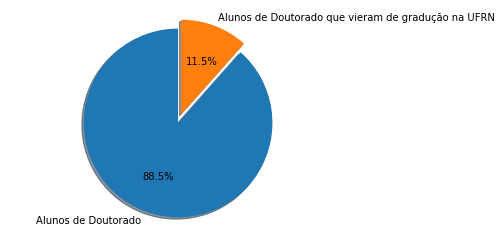

In [10]:
#cria um gráfico para mostrar a proporção de alunos que fazem a graduação e que em seguida fazem doutorado
fig1, ax1 = plt.subplots()
labels = 'Alunos de Doutorado', 'Alunos de Doutorado que vieram de gradução na UFRN'
explode = (0, 0.1)
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

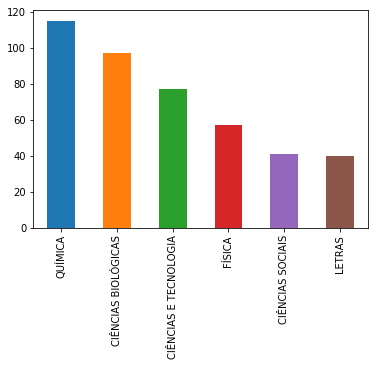

In [49]:
#pega a interseção entre os graduandos e os doutorandos porém agora em uma tabela pandas,
#pois assim podemos pegar os cursos.
#mostra os cursos que mais tem alunos na pós graduação
cursos = pd.merge(dout_all,grad, how='inner', on=['nome_discente'])
cursos['nome_curso_y'].value_counts()[0:6].plot(kind='bar')

# Preparação e Limpeza dos Dados

In [210]:
# Adaptando o dataframe turma e disciplinas para o merge
# Esse procedimento é necessário pois o dataframe turma está codificado com ids

# A coluna id_componente precisa ser a mesma em ambos os dataframes
turmas.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

# id_componente em ambos os dataframes precisam ser do mesmo tipo
turmas.id_componente = turmas.id_componente.astype(str)

# Limpando o dataframe disciplinas com linhas desnecessárias
disciplinas.dropna(inplace=True)
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]

In [211]:
# Fazendo um merge entre o dataframe turmas e disciplinas utilizando como base a coluna id_componente
# https://pandas.pydata.org/pandas-docs/stable/merging.html
colunas = ["id_turma","id_docente_interno","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario"]

# merge os dois dataframes utilizando como base a coluna id_componenteb
merge_turmas_disciplinas = pd.merge(turmas, disciplinas, on='id_componente')[colunas]

merge_turmas_disciplinas.dropna(inplace=True)
merge_turmas_disciplinas.head()

,id_turma,id_docente_interno,codigo,nivel_ensino,nome,unidade_responsavel,situacao_turma,capacidade_aluno,descricao_horario
0,57602957,5753061.0,ART2077,LATO SENSU,PRODUÇÃO COREOGRÁFICA I,DEPARTAMENTO DE ARTES,CONSOLIDADA,40.0,7M2345 7T23456
2,57602962,5752714.0,ART2083,LATO SENSU,VIESES ARTÍSTICOS CONTEMPORÂNEOS EM DANÇA ...,DEPARTAMENTO DE ARTES,ABERTA,40.0,1M345 7M2345 17T23456
3,57602963,3031948.0,ART2086,LATO SENSU,PRÁTICAS DE IMPROVISAÇÃO PARA A CENA DAS DANÇA...,DEPARTAMENTO DE ARTES,CONSOLIDADA,40.0,7M2345 7T3456
4,57603192,5752917.0,MUT491,TÉCNICO,ARRANJOS II,ESCOLA DE MÚSICA,CONSOLIDADA,20.0,3T34
5,57603193,35466.0,MUT102,TÉCNICO,CANTO II,ESCOLA DE MÚSICA,CONSOLIDADA,3.0,3T456


## Filtrar as turmas do IMD

In [226]:
# filtrando as turmas com código IMD
turmas_imd = merge_turmas_disciplinas[merge_turmas_disciplinas.codigo.str.contains("IMD")]

# utilizar apenas disciplinas com código "CONSOLIDADA"
turmas_imd = turmas_imd[turmas_imd.situacao_turma == 'CONSOLIDADA']

# Adaptar o nome da coluna id_docente_interno para id_servidor
turmas_imd.rename(columns={'id_docente_interno': 'id_servidor'}, inplace=True)

turmas_imd.capacidade_aluno = turmas_imd.capacidade_aluno.astype(np.int64)

# Adaptar os tipos de dados em turmas_imd para o merge com o dataframe docentes
turmas_imd.id_servidor = turmas_imd.id_servidor.astype(np.int64)

In [227]:
# merge os dataframes  turmas_imd e docentes utilizando como base a coluna id_servidor

colunas = ["id_turma", "codigo", "nivel_ensino", "nome_y", "codigo", "nivel_ensino",
          "nome_x","capacidade_aluno", "descricao_horario"]
turmas_imd_nomesprof = pd.merge(turmas_imd, docentes, on='id_servidor')[colunas]
turmas_imd_nomesprof.head()

,id_turma,codigo,nivel_ensino,nome_y,codigo,nivel_ensino,nome_x,capacidade_aluno,descricao_horario
0,57608376,IMD0017,GRADUAÇÃO,LUCELIO DANTAS DE AQUINO,IMD0017,GRADUAÇÃO,PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS I,60,5N34 (24/07/2017 - 16/12/2017)
1,57608398,IMD0027,GRADUAÇÃO,LUCELIO DANTAS DE AQUINO,IMD0027,GRADUAÇÃO,PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS II,60,3N34 (24/07/2017 - 16/12/2017)
2,57608691,IMD0335,GRADUAÇÃO,LUCELIO DANTAS DE AQUINO,IMD0335,GRADUAÇÃO,TÓPICOS ESPECIAIS I,40,35T56 (24/07/2017 - 16/12/2017)
3,57608377,IMD0019,GRADUAÇÃO,LOURENA KARIN DE MEDEIROS ROCHA,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,65,246M3456 (24/07/2017 - 16/12/2017)
4,57608377,IMD0019,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,65,246M3456 (24/07/2017 - 16/12/2017)


## Notas IMD

In [238]:
# filtrar apenas as turmas do IMD
notas_imd = notas[notas.id_turma.isin(turmas_imd_nomesprof.id_turma)]

# merge entre os dataframes notas_imd e turmas_imd_nomesprof utilizando como referencia id_turma
notas_imd_merge = pd.merge(notas_imd, turmas_imd_nomesprof, on='id_turma')
notas_imd_merge.head()

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,codigo,nivel_ensino,nome_y,codigo,nivel_ensino,nome_x,capacidade_aluno,descricao_horario
0,57608383,8488e52d4ca947f5504905cb261636ca,92127264.0,3.0,0.0,f,0.0,1.3,0.0,CANCELADO,IMD0012.0,GRADUAÇÃO,ISAAC FRANCO FERNANDES,IMD0012.0,GRADUAÇÃO,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,40,24T34 (24/07/2017 - 16/12/2017)
1,57608383,8488e52d4ca947f5504905cb261636ca,92127264.0,3.0,0.0,f,0.0,1.3,0.0,CANCELADO,IMD0012.0,GRADUAÇÃO,JULIO CESAR PAULINO DE MELO,IMD0012.0,GRADUAÇÃO,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,40,24T34 (24/07/2017 - 16/12/2017)
2,57608383,8488e52d4ca947f5504905cb261636ca,92127264.0,2.0,0.0,f,0.0,1.3,0.0,CANCELADO,IMD0012.0,GRADUAÇÃO,ISAAC FRANCO FERNANDES,IMD0012.0,GRADUAÇÃO,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,40,24T34 (24/07/2017 - 16/12/2017)
3,57608383,8488e52d4ca947f5504905cb261636ca,92127264.0,2.0,0.0,f,0.0,1.3,0.0,CANCELADO,IMD0012.0,GRADUAÇÃO,JULIO CESAR PAULINO DE MELO,IMD0012.0,GRADUAÇÃO,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,40,24T34 (24/07/2017 - 16/12/2017)
4,57608383,8488e52d4ca947f5504905cb261636ca,92127264.0,1.0,3.9,f,0.0,1.3,0.0,CANCELADO,IMD0012.0,GRADUAÇÃO,ISAAC FRANCO FERNANDES,IMD0012.0,GRADUAÇÃO,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,40,24T34 (24/07/2017 - 16/12/2017)


In [239]:
# todas as disciplinas em 2017.2
notas_imd_merge.nome_x.unique()

array(['INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO',
       'PRÁTICAS DE TÉCNICAS DE PROGRAMAÇÃO', 'DESIGN DE SOFTWARE II',
       'INTRODUÇÃO À GOVERNANÇA E GESTÃO DE TI', 'ACESSIBILIDADE DIGITAL',
       'EMPREENDEDORISMO',
       'PROCESSO DE DESENVOLVIMENTO DE SOFTWARE EDUCACIONAL',
       'TÓPICOS ESPECIAIS I', 'INTRODUÇÃO AO TESTE DE SOFTWARE',
       'PROGRAMAÇÃO CONCORRENTE E DISTRIBUÍDA',
       'RELAÇÕES ENTRE COMUNICAÇÃO, MÍDIA E EDUCAÇÃO',
       'CÁLCULO DIFERENCIAL E INTEGRAL I', 'SISTEMAS OPERACIONAIS',
       'REDES DE COMPUTADORES', 'VETORES E GEOMETRIA ANALÍTICA',
       'JOGOS DIGITAIS COMO FERRAMENTA PEDAGÓGICA',
       'DESENVOLVIMENTO DE SISTEMAS WEB I',
       'PROTOCOLO E SERVIÇOS DE INTERNET',
       'PROJETOS BASEADOS EM MICROCONTROLADORES',
       'PRÁTICAS DE LEITURA E ESCRITA EM PORTUGUÊS II',
       'TÓPICOS ESPECIAIS EM INFORMÁTICA EDUCACIONAL B"',
       'TÓPICOS ESPECIAIS EM INFORMÁTICA EDUCACIONAL C"',
       'TÓPICOS ESPECIAIS EM INFORMÁTICA EDUCACIONAL D"

In [268]:
alunos_probabilidade = notas_imd_merge[notas_imd_merge.nome_x == 'PROBABILIDADE']
alunos_probabilidade[~alunos_probabilidade.discente.duplicated()].descricao.value_counts()

APROVADO                            13
CANCELADO                            5
REPROVADO                            3
APROVADO POR NOTA                    3
TRANCADO                             2
REPROVADO POR MÉDIA E POR FALTAS     1
Name: descricao, dtype: int64

# Estudo sobre a diferença de gêneros

- No anaconda-navigator instalar o R-Studio (versão antiga 1.0.153
- No R-Studio instalar a API [GenderBR](http://fmeireles.com/blog/rstats/genderbr-predizer-sexo)
>```R
install.packages("genderBR")
```

In [1]:
# É possível executar comandos da linguagem R através da linguagem Python com o pacote rpy2
!conda install -c r rpy2 --y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/ivanovitch/anaconda3

  added / updated specs: 
    - rpy2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    r-pillar-1.0.1             |   r343h889e2dd_0          91 KB  r
    r-bit-1.1_12               |   r343h7f474d2_0         228 KB  r
    r-digest-0.6.13            |   r343h7f474d2_0         125 KB  r
    r-bit64-0.9_7              |   r343h7f474d2_0         472 KB  r
    r-rsqlite-2.0              |   r343he124285_0         1.0 MB  r
    fribidi-1.0.2              |       h1de35cc_0          62 KB
    r-assertthat-0.2.0         |   r343h889e2dd_0          47 KB  r
    pango-1.42.0               |       h0f8274a_0         521 KB
    r-dbi

In [1]:
# Carregar uma interface para objetos na linguagem R
import rpy2.robjects as robjects
%load_ext rpy2.ipython

In [2]:
%%R 
# Carregar a biblioteca genderBR
suppressMessages(library(genderBR))

## Carregar dados dos alunos

In [120]:
alunos_ingressantes_2016_url = "http://bit.do/alunos_ufrn2016"
alunos = pd.read_csv(alunos_ingressantes_2016_url, sep=";")

alunos_bti = alunos[(alunos.nome_unidade == 'INSTITUTO METROPOLE DIGITAL') & 
                    (alunos.nivel_ensino == "GRADUAÇÃO")][["matricula", "nome_discente", 
                                                           "ano_ingresso", "periodo_ingresso"]]
alunos_bti.reset_index(drop=True,inplace=True)

In [121]:
generos = []
for nome in alunos_bti.nome_discente:
    primeiro_nome = nome.split()[0]
    genero = robjects.r.get_gender(primeiro_nome)
    genero = genero.r_repr()
    genero = genero.strip('\"')
    if genero.startswith('NA'):
        genero = None
    generos.append(genero)
    
alunos_bti["generos"] = generos

In [122]:
alunos_bti.head()

,matricula,nome_discente,ano_ingresso,periodo_ingresso,generos
0,20160143986,ADDAN FELIPE NERI ANDRADE,2016,1.0,Male
1,2016092080,ADRIANA VIRGINIA MACEDO DE AZEVEDO,2016,1.0,Female
2,2016041269,AILSON FORTE DOS SANTOS,2016,1.0,Male
3,2016044206,AILTON GABRIEL FIGUEIRA DANTAS RAMOS DA SILVA,2016,1.0,Male
4,2016039547,AIRTON CORREIA DE OLIVEIRA NETO,2016,1.0,Male


In [123]:
alunos_bti.generos.value_counts()

Male      288
Female     31
Name: generos, dtype: int64